# Tutorial 01: Cumulative Distribution Transform (CDT)

This tutorial will demonstrate: how to use the forward and inverse operations of the CDT in the *optimaltransport* Python package. We will cover the following transforms:
* Forward and inverse operations of the CDT
* CDT Properties - translation, scaling, and linear separability in CDT space

In [61]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams
rcParams.update({'font.size': 12})


Create reference $I_0$ (uniform distribution) and a demo signal $I_1$

In [62]:
N=250
I0= np.ones(N)
x=np.arange(N)
mu=100
sigma=10
I1=1/(sigma*np.sqrt(2*np.pi))*np.exp(-((x-mu)**2)/(2*sigma**2))

Convert signals to strictly positive PDFs

In [63]:
epsilon = 1e-7
I0 = abs(I0) + epsilon
I0 = I0/I0.sum()
I1 = abs(I1) + epsilon
I1 = I1/I1.sum()

# Forward CDT

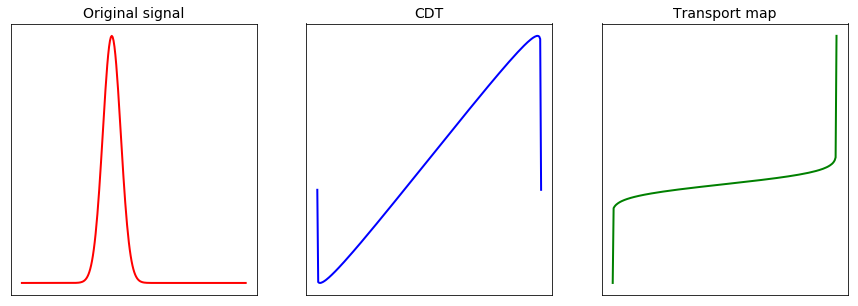

In [64]:
from optrans.continuous.cdt import CDT

# Create a CDT object
cdt = CDT()

# Compute the forward transform
I1_hat, f1_hat = cdt.forward(I0, I1, rm_edge=False)

# Plot I1 and I1_hat
fontSize=14
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(15,5))
ax[0].plot(x,I1, 'r-',linewidth=2)
ax[0].set_title('Original signal',fontsize=fontSize)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].plot(I1_hat, 'b-',linewidth=2)
ax[1].set_title('CDT',fontsize=fontSize)
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].plot(f1_hat, 'g-',linewidth=2)
ax[2].set_title('Transport map',fontsize=fontSize)
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()

# Inverse CDT
Reconstruct the original signal $I_1$ from $\hat{I_1}$ using inverse CDT

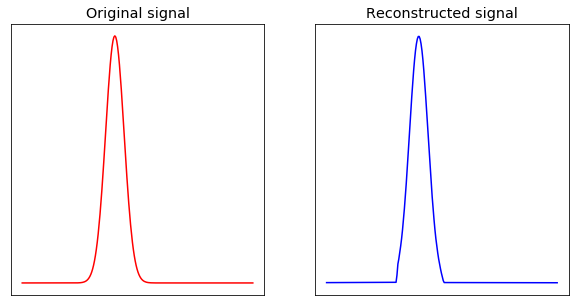

In [65]:
I1_recon = cdt.inverse()

# Plot I1 and I1_recon
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
ax[0].plot(I1, 'r-')
ax[0].set_title('Original signal')

ax[1].plot(I1_recon, 'b-')
ax[1].set_title('Reconstructed signal')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

# Translation
Generate a second signal $I_2$ which is a shifted version $I_1$, i.e. $I_2 = I_1(t-\tau)$. Then convert the signals into PDFs and compute CDT for both signals

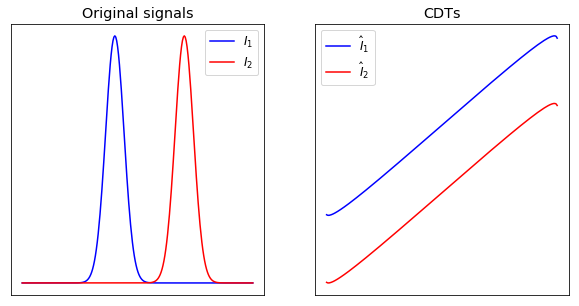

In [66]:
from scipy.ndimage.interpolation import shift
tau = 75
I1=1/(sigma*np.sqrt(2*np.pi))*np.exp(-((x-mu)**2)/(2*sigma**2))

I2 = shift(I1,tau)

# Convert signals to strictly positive PDFs
I1 = abs(I1) + epsilon
I1 = I1/I1.sum()
I2 = abs(I2) + epsilon
I2 = I2/I2.sum()

# Create a CDT object
cdt1 = CDT()

# Compute the forward transform
I1_hat, f1_hat = cdt1.forward(I0, I1, rm_edge=True)
I2_hat, f2_hat = cdt1.forward(I0, I2, rm_edge=True)

#Plot the signals and CDTs
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(10,5))
ax[0].plot(I1, 'b-')
ax[0].plot(I2, 'r-')
ax[0].set_title('Original signals')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].legend([r'$I_1$',r'$I_2$'])

ax[1].plot(I1_hat, 'b-')
ax[1].plot(I2_hat, 'r-')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('CDTs')
ax[1].legend([r'$\hat{I}_1$',r'$\hat{I}_2$'])

plt.show()

# Scaling
Generating a scaled version of $I_1$, i.e. $I_2 = I_1(\alpha t)$, and computing CDTs of both signals.

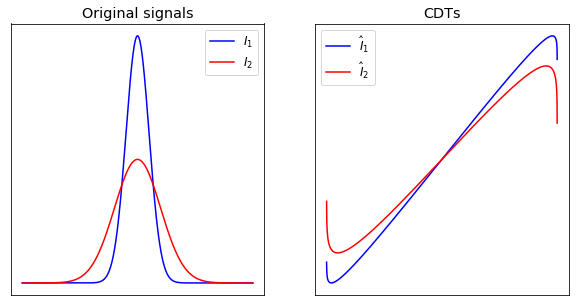

In [67]:
from scipy.stats import norm

x = np.arange(-10,10,0.001)

N=len(x)
I0= np.ones(N)

I1 = norm.pdf(x,0,1)

# create a scaled version of I1, alpha = 0.5
I2 = norm.pdf(x,0,2)

# Convert signals to strictly positive PDFs
I0 = abs(I0) + epsilon
I0 = I0/I0.sum()
I1 = abs(I1) + epsilon
I1 = I1/I1.sum()
I2 = abs(I2) + epsilon
I2 = I2/I2.sum()

# Create a CDT object
cdt2 = CDT()

# Compute the forward transform
I1_hat, f1_hat = cdt2.forward(I0, I1, rm_edge=True)
I2_hat, f2_hat = cdt2.forward(I0, I2, rm_edge=True)

#Plot the signals and CDTs
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(10,5))
ax[0].plot(I1, 'b-')
ax[0].plot(I2, 'r-')
ax[0].set_title('Original signals')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].legend([r'$I_1$',r'$I_2$'])

ax[1].plot(I1_hat, 'b-')
ax[1].plot(I2_hat, 'r-')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('CDTs')
ax[1].legend([r'$\hat{I}_1$',r'$\hat{I}_2$'])

plt.show()